# Classification of Emotions

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
tf.__version__

'2.9.2'

## Loading the images

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass/Datasets/fer_images.zip'
zib_object = zipfile.ZipFile(file = path, mode = 'r')
zib_object.extractall('./')
zib_object.close()

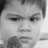

In [4]:
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Disgust/101.jpg')

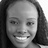

In [5]:
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Happy/1001.jpg')

### Train and test set

In [24]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('/content/fer2013/train',
                                                        target_size = (48, 48),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 28709 images belonging to 7 classes.


In [7]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [8]:
np.unique(train_dataset.classes, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


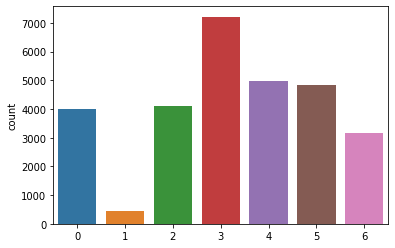

In [9]:
sns.countplot(train_dataset.classes);

In [23]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/fer2013/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.


## Building and training the convolutional neural network

In [25]:
num_detectors = 32
num_classes = 7
width, height = 48, 48
epochs = 70

network = Sequential()

network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))
print(network.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_30 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_31 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                      

In [26]:
network.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
network.fit(train_dataset, epochs=epochs)

Epoch 1/70
1795/1795 [==============================] - 50s 27ms/step - loss: 1.8454 - accuracy: 0.2750
Epoch 2/70
1795/1795 [==============================] - 47s 26ms/step - loss: 1.5267 - accuracy: 0.4049
Epoch 3/70
1795/1795 [==============================] - 47s 26ms/step - loss: 1.3830 - accuracy: 0.4671
Epoch 4/70
1795/1795 [==============================] - 47s 26ms/step - loss: 1.3098 - accuracy: 0.5039
Epoch 5/70
1795/1795 [==============================] - 46s 26ms/step - loss: 1.2598 - accuracy: 0.5252
Epoch 6/70
1795/1795 [==============================] - 45s 25ms/step - loss: 1.2113 - accuracy: 0.5458
Epoch 7/70
1795/1795 [==============================] - 44s 25ms/step - loss: 1.1768 - accuracy: 0.5594
Epoch 8/70
1795/1795 [==============================] - 47s 26ms/step - loss: 1.1501 - accuracy: 0.5729
Epoch 9/70
1795/1795 [==============================] - 46s 25ms/step - loss: 1.1233 - accuracy: 0.5820
Epoch 10/70
1795/1795 [==============================] - 45s 25m

## Saving and loading the model

In [32]:
model_json = network.to_json()
with open('network_emotions.json','w') as json_file:
  json_file.write(model_json)

In [33]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights_emotions.hdf5')

In [34]:
with open('/content/network_emotions.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_24_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_24", "trainable": true, "batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_30", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon"

In [35]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/weights_emotions.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Evaluating the neural network

In [36]:
network_loaded.evaluate(test_dataset)

3589/3589 [==============================] - 19s 5ms/step - loss: 1.4447 - accuracy: 0.5943


[1.4446533918380737, 0.5943159461021423]

In [42]:
network_loaded.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_30 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_31 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                      

In [37]:
predictions = network_loaded.predict(test_dataset)
predictions

3589/3589 [==============================] - 19s 5ms/step


array([[8.1142050e-01, 5.2575607e-02, 1.4680349e-02, ..., 1.2594101e-02,
        1.0599767e-01, 2.5901087e-03],
       [9.5464706e-01, 5.5331562e-05, 4.3520629e-02, ..., 6.0153013e-04,
        5.0090859e-04, 6.7437318e-04],
       [9.6523553e-01, 2.5038165e-04, 3.3297685e-03, ..., 4.1179690e-03,
        1.7328253e-02, 2.3319701e-05],
       ...,
       [4.3713526e-04, 6.9962248e-06, 2.0480813e-02, ..., 4.3223538e-03,
        9.3936973e-04, 9.7381228e-01],
       [5.7054209e-03, 7.4154625e-05, 2.2758788e-01, ..., 5.1359955e-02,
        5.8670430e-03, 7.0871699e-01],
       [1.8498336e-03, 8.4595005e-05, 1.8111888e-02, ..., 2.4930660e-03,
        3.9515765e-03, 9.6759361e-01]], dtype=float32)

In [38]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, ..., 6, 6, 6])

In [39]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.5943159654499861

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[293,   4,  45,  20,  49,  69,  11],
       [ 11,  40,   2,   1,   1,   0,   0],
       [ 66,   4, 234,  14,  60,  97,  53],
       [ 12,   1,   8, 781,  35,  26,  16],
       [ 91,  11,  89, 155, 110, 108,  62],
       [ 67,   0,  42,  34, 103, 339,   9],
       [  8,   0,  32,  22,  12,   6, 336]])

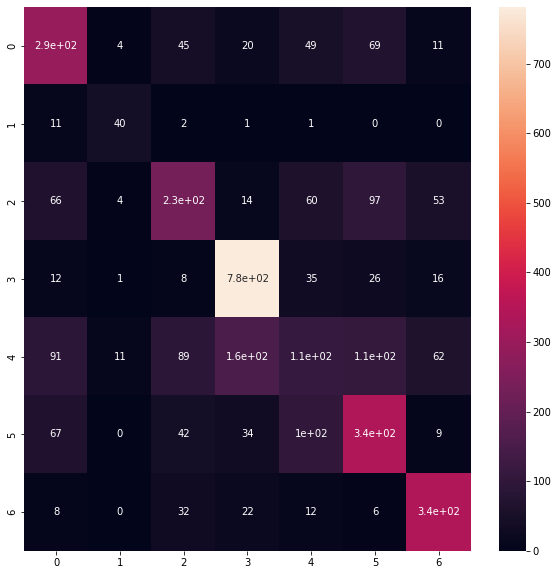

In [45]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True);

In [46]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56       491
           1       0.67      0.73      0.70        55
           2       0.52      0.44      0.48       528
           3       0.76      0.89      0.82       879
           4       0.30      0.18      0.22       626
           5       0.53      0.57      0.55       594
           6       0.69      0.81      0.74       416

    accuracy                           0.59      3589
   macro avg       0.57      0.60      0.58      3589
weighted avg       0.56      0.59      0.57      3589



In [48]:
test_dataset.class_indices  #Model has performed well for Happy emptions

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

## Classifying one single image

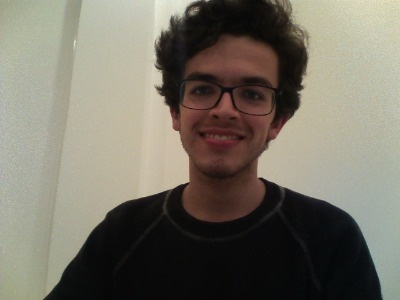

In [49]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass/Images/gabriel.png')
cv2_imshow(image)

In [50]:
image.shape

(300, 400, 3)

In [51]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass/Cascades/haarcascade_frontalface_default.xml')


In [52]:
original_image = image.copy()

In [53]:
faces = face_detector.detectMultiScale(original_image)
faces

array([[162,  40, 128, 128]], dtype=int32)

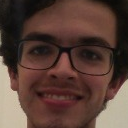

In [55]:
roi = image [40:40+128, 162:162+128]
cv2_imshow(roi)

In [56]:
roi.shape

(128, 128, 3)

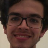

In [57]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [58]:
roi.shape

(48, 48, 3)

In [59]:
roi

array([[[ 28,  32,  37],
        [ 22,  28,  34],
        [ 33,  37,  42],
        ...,
        [ 12,  16,  17],
        [ 16,  21,  25],
        [ 16,  25,  30]],

       [[ 27,  31,  36],
        [ 31,  36,  41],
        [ 32,  36,  41],
        ...,
        [ 11,  16,  19],
        [ 13,  19,  24],
        [ 17,  25,  28]],

       [[ 27,  31,  36],
        [ 30,  34,  39],
        [ 26,  30,  35],
        ...,
        [ 12,  17,  20],
        [ 14,  20,  25],
        [ 20,  25,  27]],

       ...,

       [[162, 185, 197],
        [166, 188, 200],
        [166, 188, 200],
        ...,
        [162, 181, 188],
        [162, 182, 188],
        [161, 180, 187]],

       [[160, 184, 196],
        [165, 187, 199],
        [166, 188, 200],
        ...,
        [161, 180, 187],
        [162, 181, 187],
        [161, 180, 187]],

       [[160, 184, 196],
        [163, 187, 199],
        [165, 187, 199],
        ...,
        [160, 179, 186],
        [161, 180, 187],
        [162, 181, 188]]

In [60]:
roi = roi/255
roi.shape

(48, 48, 3)

In [61]:
roi

array([[[0.10980392, 0.1254902 , 0.14509804],
        [0.08627451, 0.10980392, 0.13333333],
        [0.12941176, 0.14509804, 0.16470588],
        ...,
        [0.04705882, 0.0627451 , 0.06666667],
        [0.0627451 , 0.08235294, 0.09803922],
        [0.0627451 , 0.09803922, 0.11764706]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.12156863, 0.14117647, 0.16078431],
        [0.1254902 , 0.14117647, 0.16078431],
        ...,
        [0.04313725, 0.0627451 , 0.0745098 ],
        [0.05098039, 0.0745098 , 0.09411765],
        [0.06666667, 0.09803922, 0.10980392]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.11764706, 0.13333333, 0.15294118],
        [0.10196078, 0.11764706, 0.1372549 ],
        ...,
        [0.04705882, 0.06666667, 0.07843137],
        [0.05490196, 0.07843137, 0.09803922],
        [0.07843137, 0.09803922, 0.10588235]],

       ...,

       [[0.63529412, 0.7254902 , 0.77254902],
        [0.65098039, 0.7372549 , 0.78431373],
        [0.65098039, 0

In [62]:
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 3)

In [63]:
probs = network_loaded.predict(roi)
probs

1/1 [==============================] - 0s 203ms/step


array([[1.1929338e-03, 3.7926179e-06, 4.2890627e-03, 9.2255163e-01,
        6.9764972e-02, 1.9690702e-03, 2.2848466e-04]], dtype=float32)

In [64]:
result = np.argmax(probs)
result

3

In [65]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

## Classifying multiple images

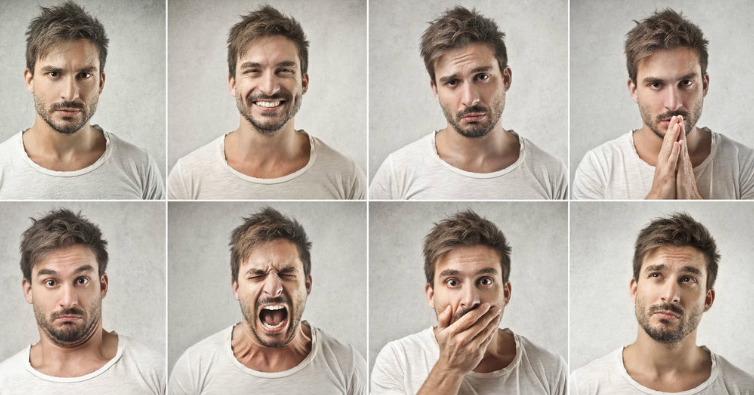

In [66]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass/Images/faces_emotions.png')
cv2_imshow(image)

In [68]:
faces = face_detector.detectMultiScale(image)

In [69]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [71]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 [==============================] - 0s 16ms/step


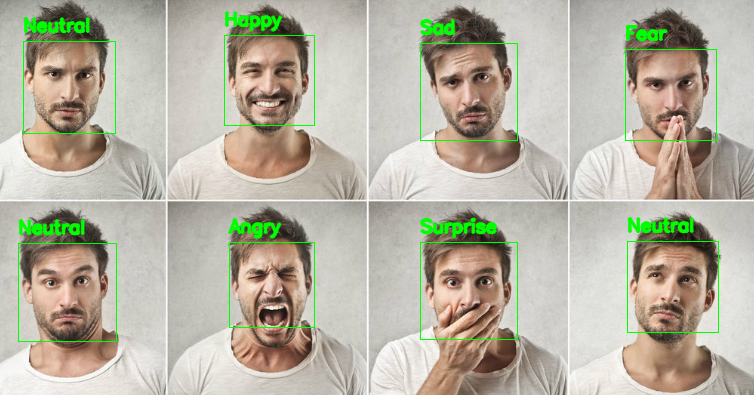

In [75]:
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)
  roi = image[y:y+h, x:x+w]
  roi = cv2.resize(roi, (48, 48))
  roi = roi/255
  roi = np.expand_dims(roi, axis = 0)
  #print(roi.shape)
  predictions = network_loaded.predict(roi)
  cv2.putText(image, emotions[np.argmax(predictions)],
              (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(image)

## Classifying emotions in videos

In [77]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass/Videos/emotion_test01.mp4')
connected, video = cap.read()
print(connected, video.shape)

True (360, 640, 3)


In [79]:
save_path = '/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass/Videos/emotion_test01_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [ ]:
while(cv2.waitKey(1) < 0):
  connected, frame = cap.read()
  if not connected:
    break
  faces = face_detector.detectMultiScale(frame, scaleFactor = 1.2, minNeighbors = 5, minSize = (30, 30))
  if len(faces) > 0:
    for (x, y, w, h) in faces:
      frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
      roi = frame[y:y+h, x:x+w]
      roi = cv2.resize(roi, (48, 48))
      roi = roi/255
      roi = np.expand_dims(roi, axis = 0)
      predictions = network_loaded.predict(roi)
      if predictions is not None:
        result = np.argmax(predictions)
        cv2.putText(frame, emotions[result], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2_imshow(frame)
    output_video.write(frame)
print('End')
output_video.release()
cv2.destroyAllWindows()

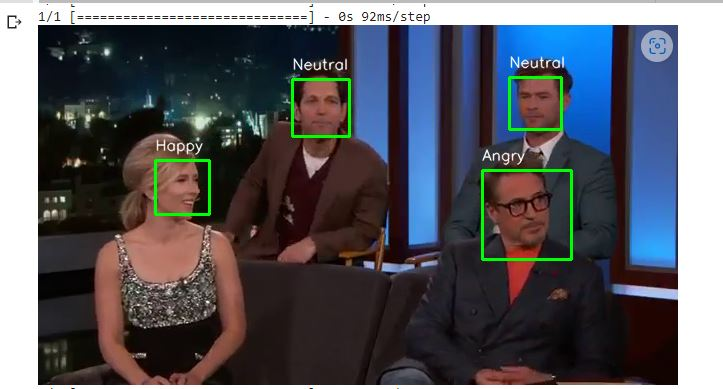